# Laboratory work 1 | OpenCV basics

## Imports

In [1]:
import urllib
from dataclasses import dataclass
from enum import Enum

import cv2
import matplotlib.pyplot as plt
import numpy as np

## Common

#### Load image

In [2]:
image_url = "https://i.ytimg.com/vi/q9qGJfKpe5s/maxresdefault.jpg"

In [3]:
data_path = "../data"
image_path = "image.jpg"

In [4]:
urllib.request.urlretrieve(image_url, f"{data_path}/{image_path}")

('../data/image.jpg', <http.client.HTTPMessage at 0x7fc058c32600>)

#### Read image

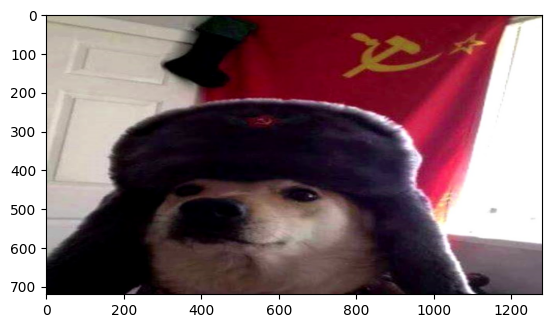

In [5]:
image = cv2.imread(f"{data_path}/{image_path}")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

#### Image channels

In [6]:
b_channel = image[:, :, 0]
g_channel = image[:, :, 1]
r_channel = image[:, :, 2]

#### Support classes

In [7]:
class BorderType(Enum):
    COLOR = "color"
    CLAMP = "clamp"
    MIRROR = "mirror"

In [8]:
@dataclass
class RGBColor:
    red: int
    green: int
    blue: int

In [9]:
@dataclass
class HSVColor:
    hue: int
    saturation: int
    value: int

In [10]:
class ImageRGBChannel(Enum):
    BLUE = 0
    GREEN = 1
    RED = 2

In [11]:
class ImageHSVChannel(Enum):
    HUE = 0
    SATURATION = 0
    VALUE = 1

In [12]:
@dataclass
class RectCoords:
    x_1: int
    y_1: int
    x_2: int
    y_2: int

## Task 1 | Read and show

#### Red channel

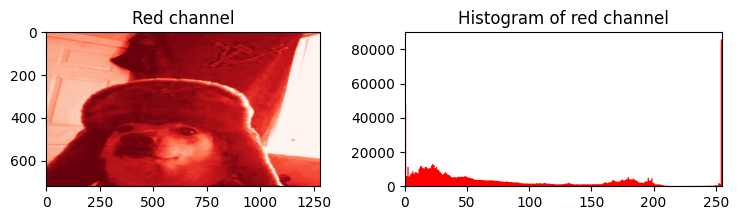

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(9, 2))

axs[0].imshow(r_channel, cmap="Reds_r")
axs[0].set_title("Red channel")
axs[1].hist(r_channel.ravel(), bins=256, color="r", histtype="stepfilled")
axs[1].set_xlim([0, 255])
axs[1].set_title("Histogram of red channel")

plt.show()

#### Green channel

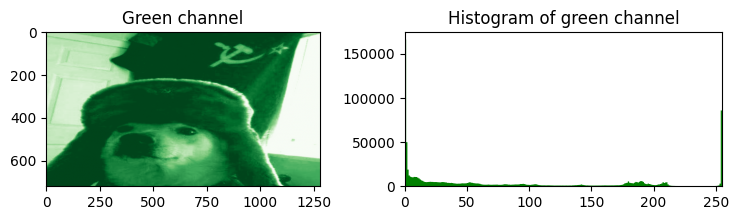

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(9, 2))

axs[0].imshow(g_channel, cmap="Greens_r")
axs[0].set_title("Green channel")
axs[1].hist(g_channel.ravel(), bins=256, color="g", histtype="stepfilled")
axs[1].set_xlim([0, 255])
axs[1].set_title("Histogram of green channel")

plt.show()

#### Blue channel

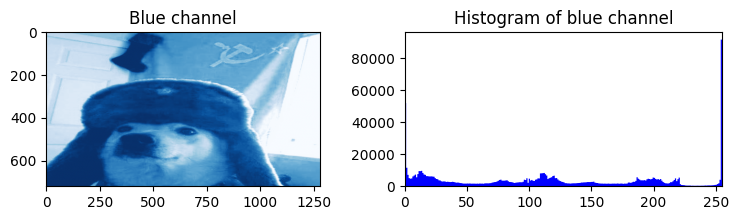

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(9, 2))

axs[0].imshow(b_channel, cmap="Blues_r")
axs[0].set_title("Blue channel")
axs[1].hist(b_channel.ravel(), bins=256, color="b", histtype="stepfilled")
axs[1].set_xlim([0, 255])
axs[1].set_title("Histogram of blue channel")

plt.show()

## Task 2 | Adding borders

#### Color border

In [16]:
def add_color_border(
    image: np.ndarray, border_size: int, border_color: RGBColor
) -> np.ndarray:
    new_image = np.zeros(
        (image.shape[0] + 2 * border_size, image.shape[1] + 2 * border_size, 3),
        dtype=np.uint8,
    )
    new_image[:] = (border_color.blue, border_color.green, border_color.red)
    new_image[border_size:-border_size, border_size:-border_size, :] = image
    return new_image

#### Clamp border

In [17]:
def add_clamp_border(image: np.ndarray, border_size: int) -> np.ndarray:
    new_image = np.zeros(
        (image.shape[0] + 2 * border_size, image.shape[1] + 2 * border_size, 3),
        dtype=np.uint8,
    )
    new_image[border_size:-border_size, border_size:-border_size, :] = image

    for i in range(border_size):
        new_image[i, border_size:-border_size, :] = image[0, :, :]
        new_image[-i - 1, border_size:-border_size, :] = image[-1, :, :]

    for j in range(border_size):
        new_image[:, j, :] = new_image[:, border_size, :]
        new_image[:, -j - 1, :] = new_image[:, -border_size - 1, :]

    return new_image

#### Mirror border

In [18]:
def add_mirror_border(image: np.ndarray, border_size: int) -> np.ndarray:
    new_image = np.zeros(
        (image.shape[0] + 2 * border_size, image.shape[1] + 2 * border_size, 3),
        dtype=np.uint8,
    )
    new_image[border_size:-border_size, border_size:-border_size, :] = image

    for i in range(border_size):
        new_image[border_size - i, border_size:-border_size, :] = image[i, :, :]
        new_image[new_image.shape[0] - i - 1, border_size:-border_size, :] = image[
            image.shape[0] - border_size + i - 1, :, :
        ]

    for j in range(border_size):
        new_image[:, j, :] = new_image[:, 2 * border_size - j - 1, :]
        new_image[:, -j - 1, :] = new_image[:, -(2 * border_size) + j - 1, :]

    return new_image

#### Summary

In [19]:
def add_border(
    image: np.ndarray,
    border_type: BorderType,
    border_size,
    border_color: RGBColor = RGBColor(0, 0, 0),
) -> np.ndarray:
    match border_type:
        case BorderType.COLOR:
            return add_color_border(image, border_size, border_color)
        case BorderType.CLAMP:
            return add_clamp_border(image, border_size)
        case BorderType.MIRROR:
            return add_mirror_border(image, border_size)

#### Methods application

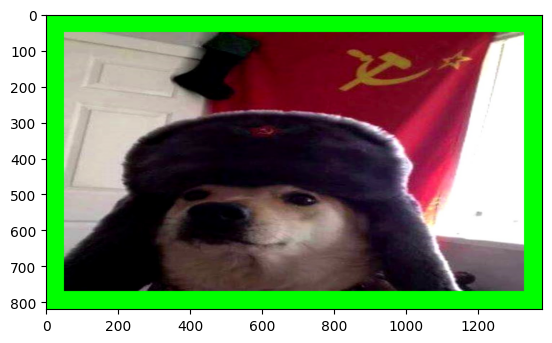

In [20]:
image_color_border = add_border(image.copy(), BorderType.COLOR, 50, RGBColor(0, 255, 0))
plt.imshow(image_color_border)
plt.show()

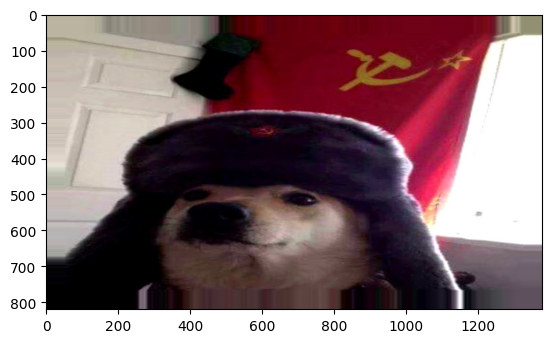

In [21]:
image_clamp_border = add_border(image.copy(), BorderType.CLAMP, 50)
plt.imshow(image_clamp_border)
plt.show()

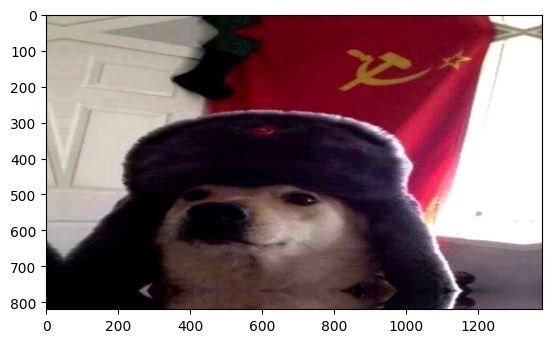

In [22]:
image_mirror_border = add_border(image.copy(), BorderType.MIRROR, 50)
plt.imshow(image_mirror_border)
plt.show()

## Task 3 | RGB -> Gray

#### OpenCV gray

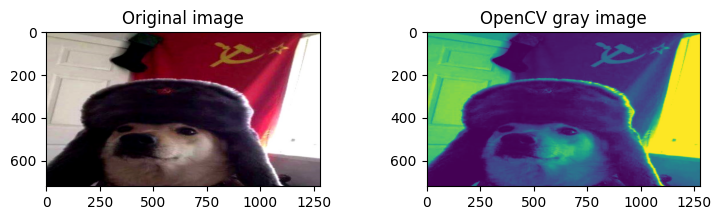

In [23]:
opencv_gray_image = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)

fig, axs = plt.subplots(1, 2, figsize=(9, 2))

axs[0].imshow(image)
axs[0].set_title("Original image")
axs[1].imshow(opencv_gray_image)
axs[1].set_title("OpenCV gray image")

plt.show()

#### Fake gray

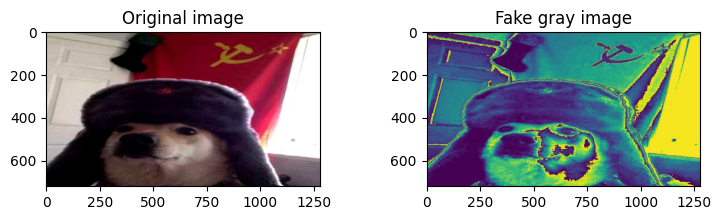

In [24]:
fake_gray_image = (b_channel + g_channel + r_channel) // 3
fake_gray_image = fake_gray_image.astype(np.uint8)

fig, axs = plt.subplots(1, 2, figsize=(9, 2))

axs[0].imshow(image)
axs[0].set_title("Original image")
axs[1].imshow(fake_gray_image)
axs[1].set_title("Fake gray image")

plt.show()

#### Gray

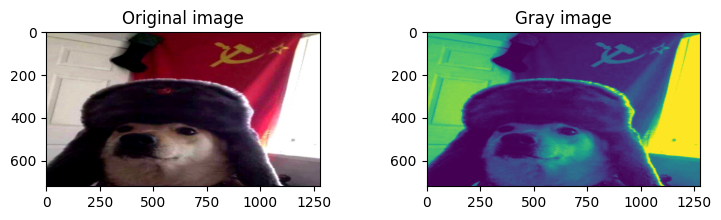

In [25]:
gray_image = image.copy() @ [0.114, 0.587, 0.299]
gray_image = gray_image.astype(np.uint8)

fig, axs = plt.subplots(1, 2, figsize=(9, 2))

axs[0].imshow(image)
axs[0].set_title("Original image")
axs[1].imshow(gray_image)
axs[1].set_title("Gray image")

plt.show()

## Task 4 | Pixel manipulation

#### `shift_image` method implementation

In [26]:
def shift_image(
    image: np.ndarray, image_channel: ImageRGBChannel | ImageHSVChannel, value: float
) -> np.ndarray:
    channel_0 = image[:, :, 0]
    channel_1 = image[:, :, 1]
    channel_2 = image[:, :, 2]

    match image_channel:
        case ImageRGBChannel.BLUE | ImageHSVChannel.VALUE:
            channel_0 = channel_0 * value
            channel_0 = channel_0.astype(np.uint8)
        case ImageRGBChannel.GREEN | ImageHSVChannel.SATURATION:
            channel_1 = channel_1 * value
            channel_1 = channel_1.astype(np.uint8)
        case ImageRGBChannel.RED | ImageHSVChannel.VALUE:
            channel_2 = channel_2 * value
            channel_2 = channel_2.astype(np.uint8)

    return cv2.merge((channel_0, channel_1, channel_2))

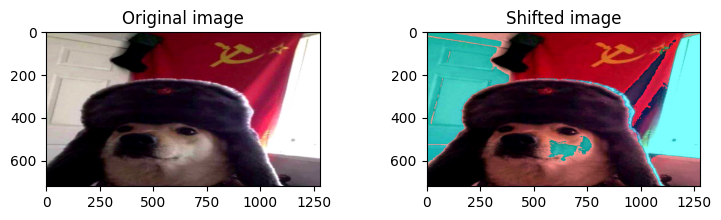

In [27]:
shifted_image = shift_image(image.copy(), ImageRGBChannel.BLUE, 1.5)

fig, axs = plt.subplots(1, 2, figsize=(9, 2))

axs[0].imshow(image)
axs[0].set_title("Original image")
axs[1].imshow(shifted_image)
axs[1].set_title("Shifted image")

plt.show()

#### `get_rect` method implementation

In [28]:
def get_rect(
    image: np.ndarray, rect_coords: RectCoords, rect_color: RGBColor
) -> tuple[np.ndarray, np.ndarray]:
    new_image = image.copy()

    rect = image[rect_coords.y_1 : rect_coords.y_2, rect_coords.x_1 : rect_coords.x_2]
    new_image[rect_coords.y_1 : rect_coords.y_2, rect_coords.x_1 : rect_coords.x_2] = (
        rect_color.blue,
        rect_color.green,
        rect_color.red,
    )

    return rect, new_image

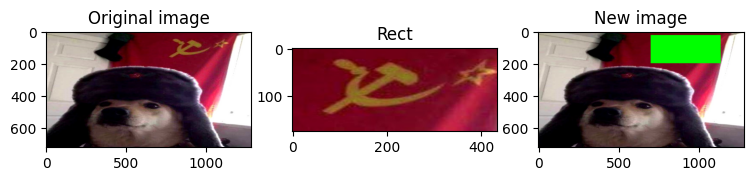

In [29]:
rect_coords = RectCoords(700, 25, 1135, 200)
rect, new_image = get_rect(image.copy(), rect_coords, RGBColor(0, 255, 0))

fig, axs = plt.subplots(1, 3, figsize=(9, 2))

axs[0].imshow(image)
axs[0].set_title("Original image")
axs[1].imshow(rect)
axs[1].set_title("Rect")
axs[2].imshow(new_image)
axs[2].set_title("New image")

plt.show()

## Task 5 | RGB <-> HSV

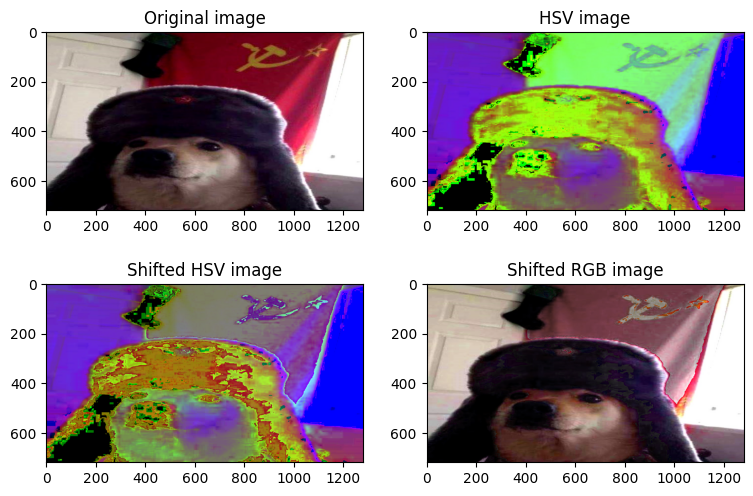

In [30]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
shifted_hsv_image = shift_image(hsv_image.copy(), ImageHSVChannel.HUE, 1.5)
shifted_rgb_image = cv2.cvtColor(shifted_hsv_image, cv2.COLOR_HSV2BGR)

fig, axs = plt.subplots(2, 2, figsize=(9, 6))

axs[0][0].imshow(image)
axs[0][0].set_title("Original image")
axs[0][1].imshow(hsv_image)
axs[0][1].set_title("HSV image")
axs[1][0].imshow(shifted_hsv_image)
axs[1][0].set_title("Shifted HSV image")
axs[1][1].imshow(shifted_rgb_image)
axs[1][1].set_title("Shifted RGB image")

plt.show()